In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

#### ***1.1 Data Preparation***



In [3]:
df_rating=pd.read_csv('/Users/riccardo.soleo/Desktop/ADM-HW4/archive/rating.csv')
df_rating=pd.DataFrame(df_rating)
df_movies = pd.read_csv('/Users/riccardo.soleo/Desktop/ADM-HW4/archive/movie.csv')
df_movies=pd.DataFrame(df_movies)

In [4]:
print(df_rating.head())
print(df_movies.head())

   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


as we can there is no need to convert the timestamps to datetime because its already in datetime


In [5]:
print(df_rating.isnull().values.any())

False


In [6]:
print(df_rating.describe())
print(df_rating['movieId'].nunique())


             userId       movieId        rating
count  2.000026e+07  2.000026e+07  2.000026e+07
mean   6.904587e+04  9.041567e+03  3.525529e+00
std    4.003863e+04  1.978948e+04  1.051989e+00
min    1.000000e+00  1.000000e+00  5.000000e-01
25%    3.439500e+04  9.020000e+02  3.000000e+00
50%    6.914100e+04  2.167000e+03  3.500000e+00
75%    1.036370e+05  4.770000e+03  4.000000e+00
max    1.384930e+05  1.312620e+05  5.000000e+00
26744


the dataset rating.csv contains ratings of movies by users with the column:

-userID: every user has his personal ID, we can see there are 138483 different users

-movieID: every movie has his own ID, there are 26744 different movies rated

-rating: the user's evaluation about the movie rated, the can give a rate from 1 to 5

-timestamp: the data and time when the user left the review

In [7]:
print(df_movies.describe(include='object'))

                 title genres
count            27278  27278
unique           27262   1342
top     Aladdin (1992)  Drama
freq                 2   4520


the other principal dataset is movie.csv, and its the dataset that contains all the movie rated , their corresponding ID and their genre, with a total of 1342 genres.

In [13]:
#merge the 2 dataset in order to add thw title and the genre to rating.csv
merged_df = df_rating.merge(df_movies, on="movieId", how="left")
most_reviewed_movies=merged_df['title'].value_counts().head(10)
print(most_reviewed_movies)


title
Pulp Fiction (1994)                          67310
Forrest Gump (1994)                          66172
Shawshank Redemption, The (1994)             63366
Silence of the Lambs, The (1991)             63299
Jurassic Park (1993)                         59715
Star Wars: Episode IV - A New Hope (1977)    54502
Braveheart (1995)                            53769
Terminator 2: Judgment Day (1991)            52244
Matrix, The (1999)                           51334
Schindler's List (1993)                      50054
Name: count, dtype: int64


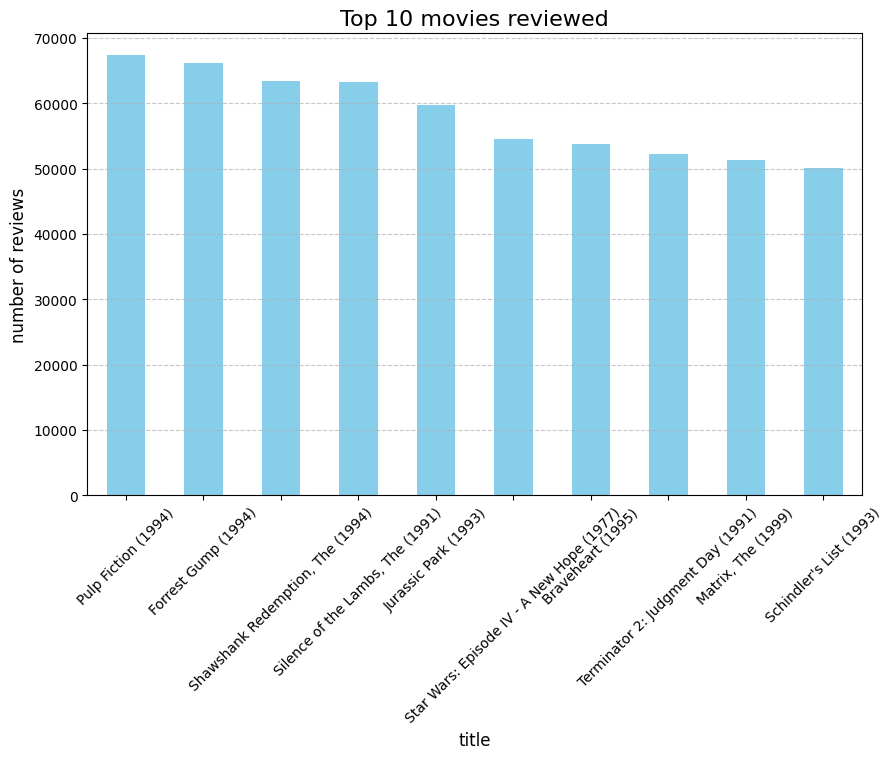

In [15]:
plt.figure(figsize=(10, 6))
most_reviewed_movies.plot(kind='bar', color='skyblue')
plt.title("Top 10 movies reviewed", fontsize=16)
plt.xlabel("title", fontsize=12)
plt.ylabel("number of reviews", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

as we can see the most reviewed movies are pulp fiction, forrest gump etc.
all movies from the 90s!

In [22]:
most_active_users=merged_df['userId'].value_counts().head(10)
print(most_active_users)

userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
74142     5447
34576     5356
131904    5330
83090     5169
59477     4988
Name: count, dtype: int64


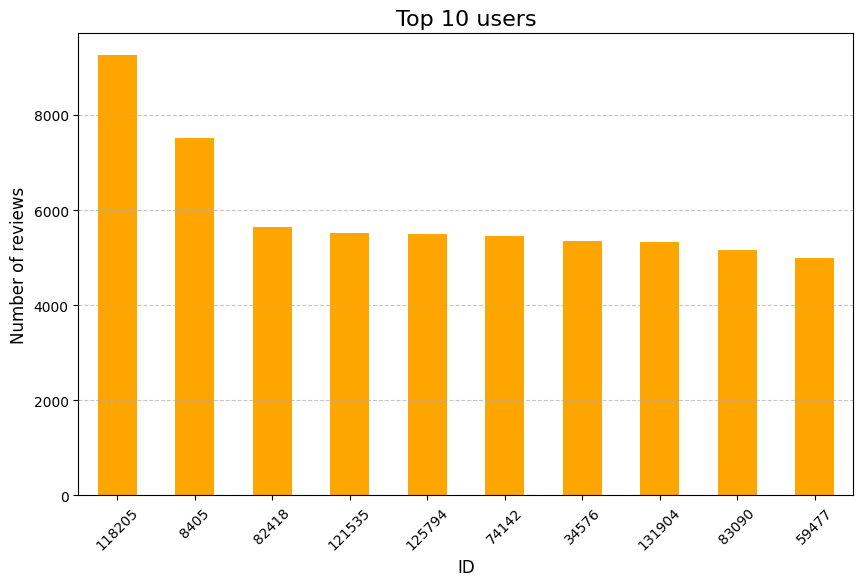

In [19]:
plt.figure(figsize=(10, 6))
most_active_users.plot(kind='bar', color='orange')
plt.title("Top 10 users", fontsize=16)
plt.xlabel("ID", fontsize=12)
plt.ylabel("Number of reviews", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

wow there are users with more than 6000 movies reviewed.
we could remove them.

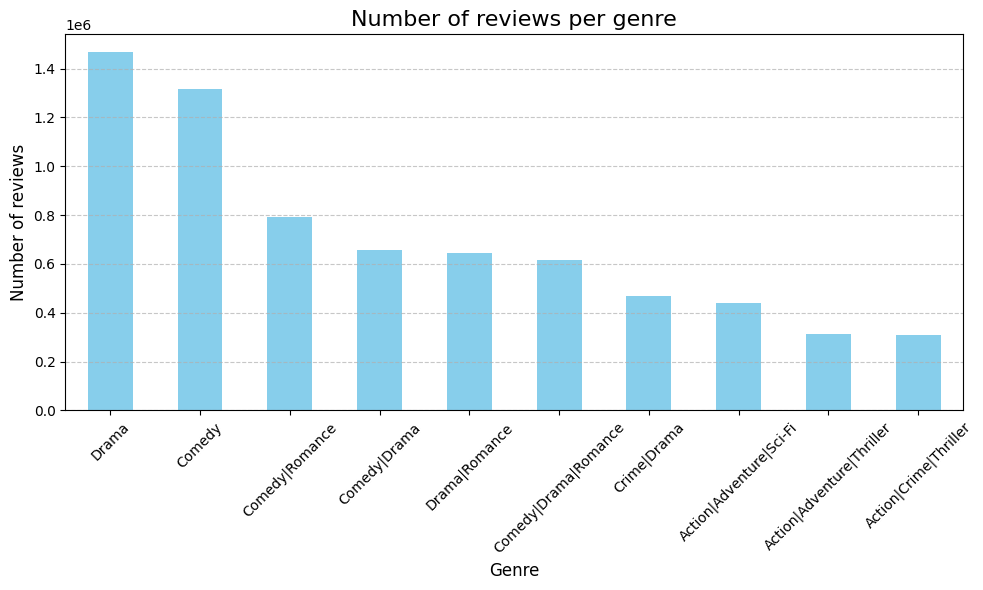

In [27]:
genre_counts_top10 = merged_df['genres'].value_counts().head(10)
plt.figure(figsize=(10, 6))
genre_counts_top10.plot(kind='bar', color='skyblue')
plt.title("Number of reviews per genre", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of reviews", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

the top genres reviewed are drama and comedy and their subgenres, followed by action,crime and thriller movies.

In [28]:
average_ratings = df_rating.groupby('movieId')['rating'].mean().reset_index()
average_ratings.rename(columns={'rating': 'average_rating'}, inplace=True)

#add a new column with the average rating for each movie
merged_df = merged_df.merge(average_ratings, on="movieId", how="left")
print(merged_df.head())

   userId  movieId  rating            timestamp  \
0       1        2     3.5  2005-04-02 23:53:47   
1       1       29     3.5  2005-04-02 23:31:16   
2       1       32     3.5  2005-04-02 23:33:39   
3       1       47     3.5  2005-04-02 23:32:07   
4       1       50     3.5  2005-04-02 23:29:40   

                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cité des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                   genres  average_rating  
0              Adventure|Children|Fantasy        3.211977  
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi        3.952230  
2                 Mystery|Sci-Fi|Thriller        3.898055  
3                        Mystery|Thriller        4.053493  
4                  Crime|Mystery|Thriller        4.33437

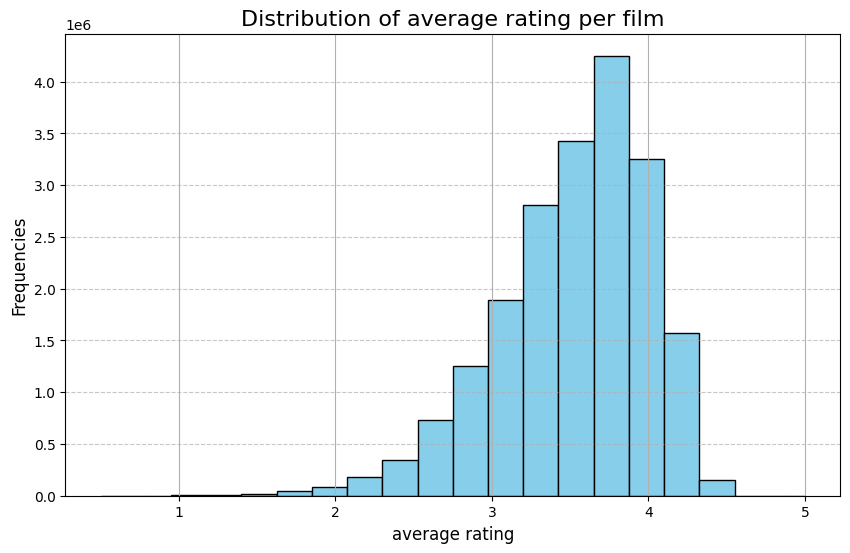

In [33]:
top_rated_movies = merged_df[['movieId', 'title', 'genres', 'average_rating']].drop_duplicates().sort_values(by='average_rating', ascending=False)
plt.figure(figsize=(10, 6))
merged_df['average_rating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of average rating per film", fontsize=16)
plt.xlabel("average rating", fontsize=12)
plt.ylabel("Frequencies", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### ***1.2 Minhash Signatures***

We shall focus initially on a particular notion of “similarity”: the similarity of sets by looking at the relative size of their intersection. This notion of similarity is called Jaccard similarity:

$J(A, B) = \frac{|A \cap B|}{|A \cup B|}$

In [34]:
def jaccard(s1,s2):
    intersection = len(s1 & s2)  # common elements
    union = len(s1 | s2)        
    return intersection / union if union > 0 else 0.0

Calculating the Jaccard Similarity directly is computationally expensive for large datasets like our,
minhashing provides a way to approximate it by using a signature of each set.

Minhashing works as follows:

1- Each item in the set is hashed using multiple hash functions.

2- For each hash function, the minimum hash value across the items in the set is recorded.

3- These "minimum values" (one per hash function) form the minhash signature for the set.

The similarity between two sets can then be estimated by comparing their minhash signatures.

$\rightarrow$ The fraction of matching hash values across all hash functions gives an approximation of the Jaccard Similarity.

In [35]:
def hash_functions(A,B,C):
    def hash_fn(x):
        return(A*x+B)%C
    return hash_fn

In [46]:
def minhash(df,num_hashes):
    #create the dict with the users and every movie they rated 
    user_movies = df.groupby('userId')['movieId'].apply(set).to_dict()
    #get all the movies rated
    tot_movies = set(df['movieId'])
    max_movie_id = max(tot_movies)
# Genera funzioni hash
    hash_fns = [

        hash_functions(
            random.randint(1, max_movie_id),
            random.randint(1, max_movie_id),
            max_movie_id + 1
        )
        for _ in range(num_hashes)
    ]

    #initialize the minhash
    signatures = {user: [float('inf')] * num_hashes for user in user_movies.keys()}

    # calculate minhash signatures
    for movie in tot_movies:
        for i, hash_fn in enumerate(hash_fns):
            hashed_value = hash_fn(movie)
            for user, movies in user_movies.items():
                if movie in movies:
                    signatures[user][i] = min(signatures[user][i], hashed_value)

    return signatures



    




In [41]:
def jaccard_similarity_minhash(sig1, sig2):
    #Compute Jaccard similarity using minhash signatures
    matches = sum(1 for h1, h2 in zip(sig1, sig2) if h1 == h2)
    return matches / len(sig1)

In [42]:
def evaluate_minhash(df, num_hashes_list, thresholds):

    results = []

    #get all users and their rated movies
    user_movies = df.groupby('userId')['movieId'].apply(set).to_dict()
    max_movie_id = max(df['movieId'])

    #iterate over different numbers of hash functions
    for num_hashes in num_hashes_list:
        print(f"Testing with {num_hashes} hash functions...")
        signatures = minhash(df, num_hashes)

        #compare pairwise similarities
        for (user1, user2) in combinations(user_movies.keys(), 2):
            actual_similarity = jaccard(user_movies[user1], user_movies[user2])
            estimated_similarity = jaccard_similarity_minhash(signatures[user1], signatures[user2])

            for threshold in thresholds:
                is_similar_actual = actual_similarity >= threshold
                is_similar_estimated = estimated_similarity >= threshold

                results.append({
                    'user1': user1,
                    'user2': user2,
                    'num_hashes': num_hashes,
                    'threshold': threshold,
                    'actual_similarity': actual_similarity,
                    'estimated_similarity': estimated_similarity,
                    'match': is_similar_actual == is_similar_estimated
                })

    return pd.DataFrame(results)

In [47]:
num_hashes_list = [50, 100, 200]
thresholds = [0.2, 0.5, 0.8]

results = evaluate_minhash(merged_df, num_hashes_list, thresholds)
print("Summary of Results:")
print(results.groupby(['num_hashes', 'threshold'])['match'].mean())



Testing with 50 hash functions...


KeyboardInterrupt: 